In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from pandas.plotting import parallel_coordinates
warnings.filterwarnings('ignore')
import statsmodels.api as st
from scipy.stats import norm as n
from scipy.stats import t as t_d
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway

In [2]:
data=pd.read_csv('/Users/ayushsingla/Downloads/Manufacturing Dataset.csv')
date = pd.DatetimeIndex(data['Date'])

In [3]:
data['doy'] = date.dayofyear
data['moy'] = date.month
data['dow'] = date.dayofweek
data.drop(columns=['Date'],inplace=True)

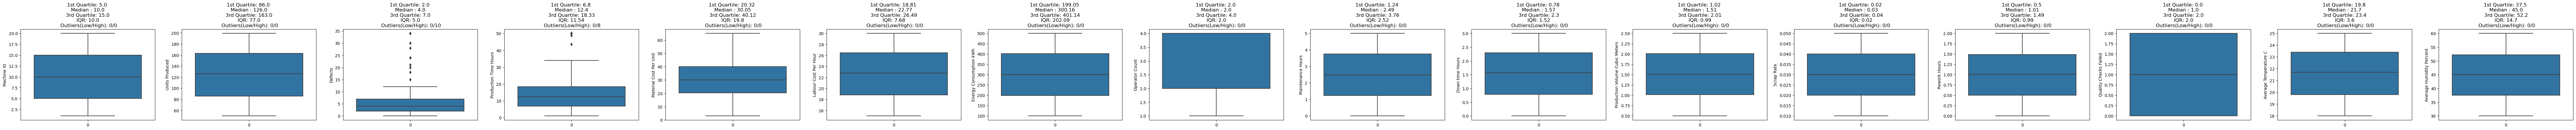

In [45]:
#Q1
numerical=data.select_dtypes(include=['int64','float64']).columns
def find_out(data, var_group):
    size=len(var_group)
    plt.figure(figsize=(7*size,4), dpi = 100)
    for j,i in enumerate(var_group):
        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)
        IQR=Q3-Q1
        low_whisk=Q1-(1.5*IQR)
        high_whisk=Q3+(1.5*IQR)
        med=data[i].median()
        count_high_outlier=len(data[i][data[i]>high_whisk])
        count_low_outlier=len(data[i][data[i]<low_whisk])
        plt.subplot(1,size,j+1)
        sns.boxplot(data[i],orient='vertical')
        plt.ylabel('{}'.format(i))
        plt.title('1st Quartile: {} \n Median : {} \n 3rd Quartile: {} \n IQR: {} \n Outliers(Low/High): {}/{}'.format(round(Q1,2),round(med,2),round(Q3,2),round(IQR,2),count_low_outlier,count_high_outlier))

        
# Function call
find_out(data,numerical)

In [48]:
#Q2
data.isna().sum()
data.loc[data.Defects.isna()==True,'Defects']=data.Defects.median()
data.loc[data['Maintenance Hours'].isna()==True,'Maintenance Hours']=data['Maintenance Hours'].mean()
data.loc[data['Down time Hours'].isna()==True,'Down time Hours']=data['Down time Hours'].mean()
data.loc[data['Rework Hours'].isna()==True,'Rework Hours']=data['Rework Hours'].mean()
data.isna().sum()

Production ID                     0
Product Type                      0
Machine ID                        0
Shift                             0
Units Produced                    0
Defects                           0
Production Time Hours             0
Material Cost Per Unit            0
Labour Cost Per Hour              0
Energy Consumption kWh            0
Operator Count                    0
Maintenance Hours                 0
Down time Hours                   0
Production Volume Cubic Meters    0
Scrap Rate                        0
Rework Hours                      0
Quality Checks Failed             0
Average Temperature C             0
Average Humidity Percent          0
doy                               0
moy                               0
dow                               0
Month_Name                        0
dtype: int64

In [ ]:
#Q3
n=data[['Material Cost Per Unit','Labour Cost Per Hour']]
corelation_var=data['Material Cost Per Unit'].corr(data['Labour Cost Per Hour'])
co=n.corr()
print('Correlation Variable b/w 2 columns is: {}'.format(corelation_var))

#correlation cofficient is negative it describes the two variables move in opposite directions

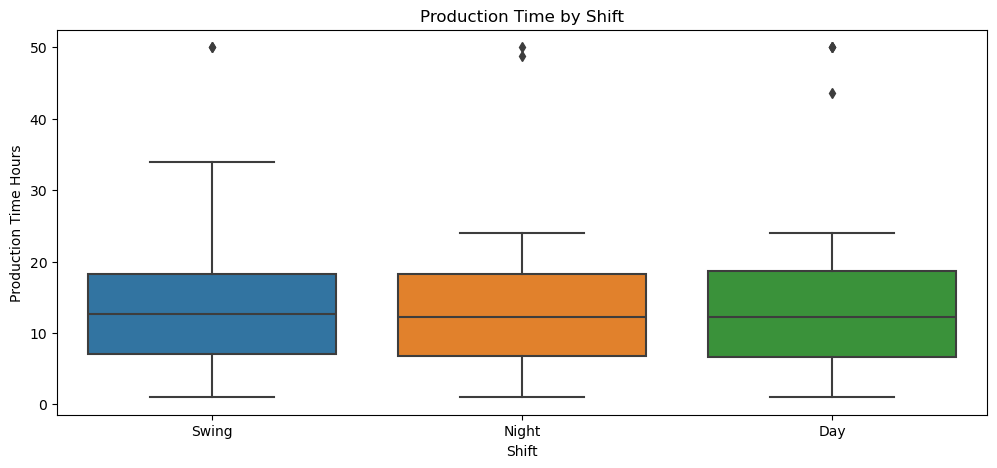

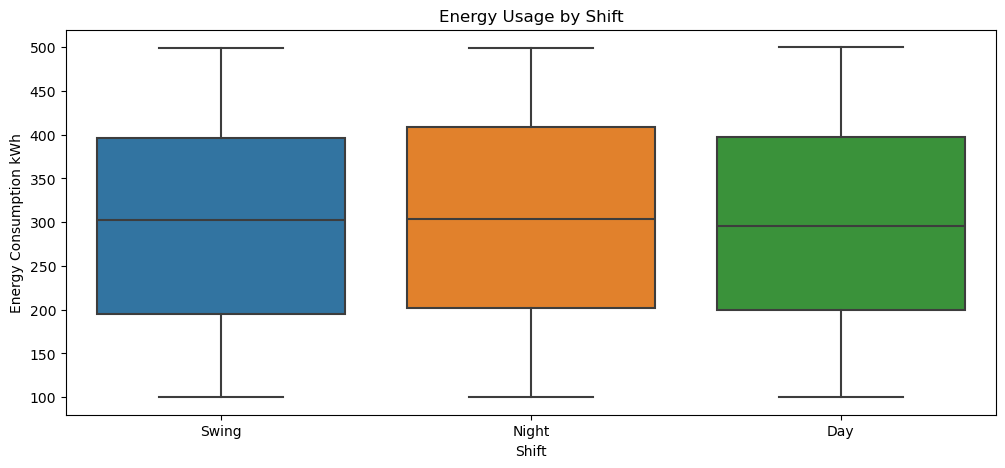

ANOVA result for Production Time: F-statistic=0.04714942761658181, p-value=0.9539455488237562
ANOVA result for Energy Usage: F-statistic=0.5264581582244601, p-value=0.5907480278318622


In [286]:
#Q5
plt.figure(figsize=(12, 5))
sns.boxplot(x='Shift', y='Production Time Hours', data=data)
plt.title('Production Time by Shift')
plt.xlabel('Shift')
plt.ylabel('Production Time Hours')
plt.show()


plt.figure(figsize=(12, 5))
sns.boxplot(x='Shift', y='Energy Consumption kWh', data=data)
plt.title('Energy Usage by Shift')
plt.xlabel('Shift')
plt.ylabel('Energy Consumption kWh')
plt.show()


day_time = data[data['Shift'] == 'Day']['Production Time Hours']
swing_time = data[data['Shift'] == 'Swing']['Production Time Hours']
night_time = data[data['Shift'] == 'Night']['Production Time Hours']

anova_time = f_oneway(day_time, swing_time, night_time)
print(f'ANOVA result for Production Time: F-statistic={anova_time.statistic}, p-value={anova_time.pvalue}')

# ANOVA for Energy Usage
day_energy = data[data['Shift'] == 'Day']['Energy Consumption kWh']
swing_energy = data[data['Shift'] == 'Swing']['Energy Consumption kWh']
night_energy = data[data['Shift'] == 'Night']['Energy Consumption kWh']

anova_energy = f_oneway(day_energy, swing_energy, night_energy)
print(f'ANOVA result for Energy Usage: F-statistic={anova_energy.statistic}, p-value={anova_energy.pvalue}')

In [ ]:
def Bivariate_cont_cat(data, cont, cat, category):

Text(0.5, 1.0, 'Montly Avg unit produced')

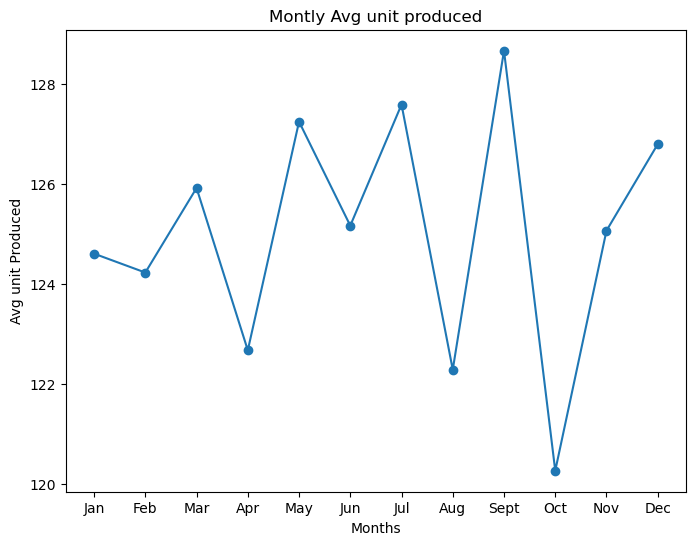

In [38]:
#Q5
z=data.groupby('moy')['Units Produced'].mean()
plt.figure(figsize = (8,6), dpi = 100)
z.index.tolist()
z.values.tolist()
plt.plot(z.index.tolist(),z.values.tolist(),marker='o')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.xlabel('Months')
plt.ylabel('Avg unit Produced')
plt.title('Montly Avg unit produced')

In [61]:
#Q6
z=data.groupby('Product Type')['Production Volume Cubic Meters'].std()
print('{}\n \nAppliances has max SD value: {},so it has most variability'.format(z,z.values[0]))

Product Type
Appliances     0.602654
Automotive     0.561560
Electronics    0.573125
Furniture      0.579365
Textiles       0.567891
Name: Production Volume Cubic Meters, dtype: float64
 
Appliances has max SD value: 0.6026537765381368,so it has most variability


Operator Count
1    124.030749
2    125.411688
3    125.898769
4    124.818908
Name: Units Produced, dtype: float64


A correlation value of 0.007216537416796932 is still very close to zero, indicating that there is virtually no linear relationship between the two variables


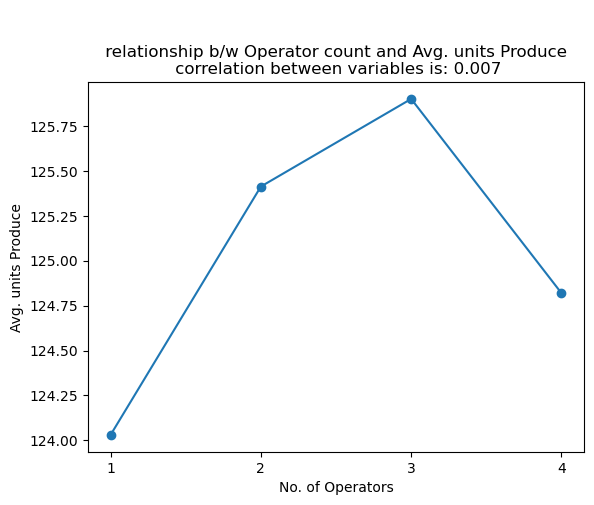

In [105]:
#Q7
group=data.groupby('Operator Count')['Units Produced'].mean()
co=data['Operator Count'].corr(data['Units Produced'])
print(group)
print('\n')
x=group.index.tolist()
y=group.values.tolist()
plt.plot(x,y,marker='o')
plt.xticks(ticks=[1.0,2.0,3.0,4.0],labels=[1,2,3,4])
plt.xlabel('No. of Operators')
plt.ylabel('Avg. units Produce')
plt.title('\n \n relationship b/w Operator count and Avg. units Produce \n correlation between variables is: {}'.format(round(co,3)))
print('A correlation value of {} is still very close to zero, indicating that there is virtually no linear relationship between the two variables'.format(co))

In [146]:
#Q8
uni=data.groupby('Machine ID')['Units Produced'].sum()
de=data.groupby('Machine ID')['Defects'].sum()
defect_rate=(de/uni)*100
print('Machine ID 18 is max value of defectRate :{}'.format(round(defect_rate.max(),2)))
z=round(defect_rate,2).sort_values(kind='quicksort',ascending=False)
print('\n {}'.format(z))

Machine ID 18 is max value of defectRate :4.08

 Machine ID
18    4.08
15    4.01
19    3.93
16    3.87
9     3.83
5     3.73
8     3.67
4     3.65
10    3.65
11    3.64
1     3.61
20    3.58
13    3.57
3     3.55
6     3.54
17    3.53
14    3.51
12    3.39
2     3.34
7     3.34
dtype: float64


Slope: -0.004449057051358084, Intercept: 4.320138180524257


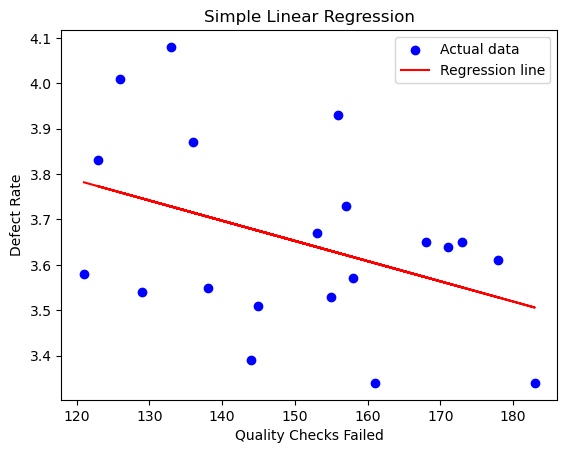

In [177]:
defect_rate=round((de/uni)*100,2)
y=np.array(defect_rate.tolist())
x=np.array(data.groupby('Machine ID')['Quality Checks Failed'].sum().tolist())
X = x.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope}, Intercept: {intercept}")
y_pred = model.predict(X)
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('Quality Checks Failed')
plt.ylabel('Defect Rate')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

<Figure size 896x672 with 0 Axes>

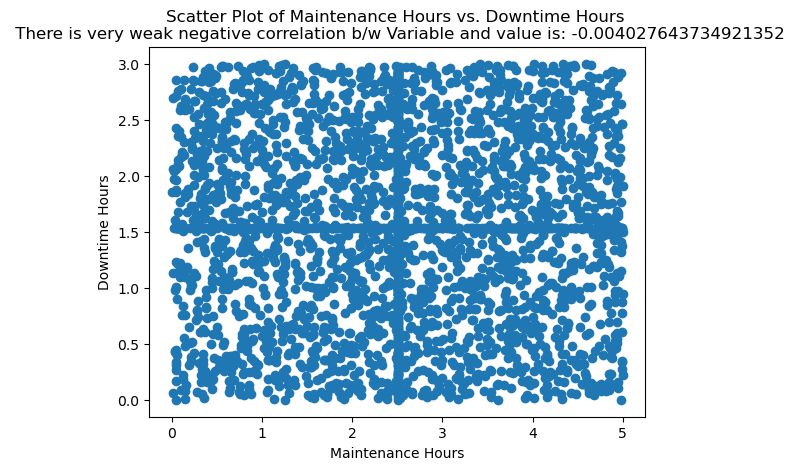

<Figure size 896x672 with 0 Axes>

In [191]:
plt.scatter(data['Maintenance Hours'],data['Down time Hours'])
corel=data['Maintenance Hours'].corr(data['Down time Hours'])
plt.title('Scatter Plot of Maintenance Hours vs. Downtime Hours \n There is very weak negative correlation b/w Variable and value is: {}'.format(corel))
plt.xlabel('Maintenance Hours')
plt.ylabel('Downtime Hours')
plt.figure(dpi=140)


Text(0, 0.5, 'Scrap Rate')

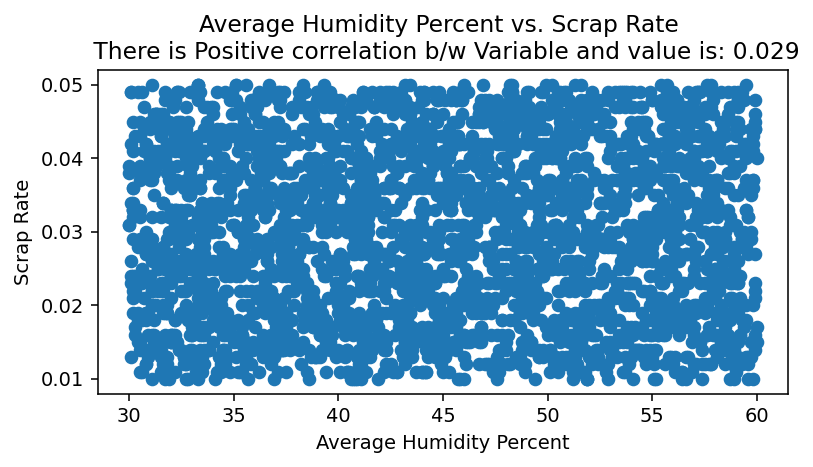

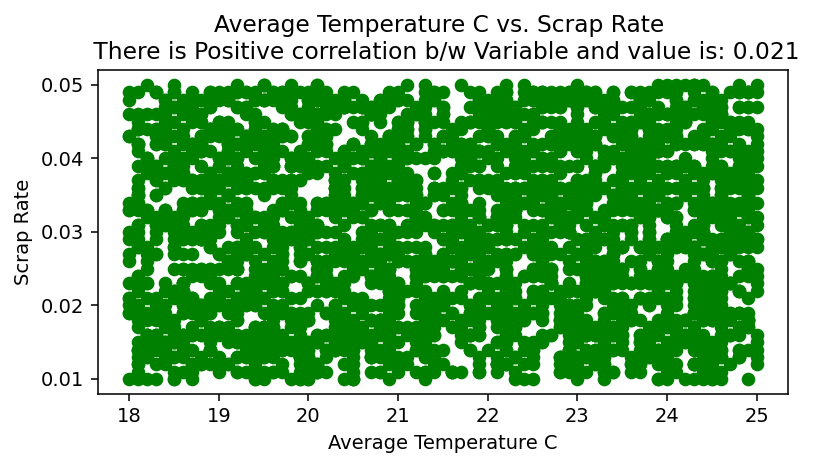

In [279]:
#Q9
plt.figure(figsize=(14,3),dpi=140)
plt.subplot(1,2,1)
plt.scatter(data['Average Humidity Percent'],data['Scrap Rate'])
corel=data['Average Humidity Percent'].corr(data['Scrap Rate'])
plt.title('Average Humidity Percent vs. Scrap Rate \n There is Positive correlation b/w Variable and value is: {}'.format(round(corel,3)))
plt.xlabel('Average Humidity Percent')
plt.ylabel('Scrap Rate')
plt.figure(figsize=(14,3),dpi=140)
plt.subplot(1,2,2)
plt.scatter(data['Average Temperature C'],data['Scrap Rate'],color='green')
corel=data['Average Temperature C'].corr(data['Scrap Rate'])
plt.title('Average Temperature C vs. Scrap Rate \n There is Positive correlation b/w Variable and value is: {}'.format(round(corel,3)))
plt.xlabel('Average Temperature C')
plt.ylabel('Scrap Rate')


In [282]:
data

,Production ID,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,Energy Consumption kWh,...,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent,doy,moy,dow,Month_Name
0,1899-12-31,Automotive,3,Swing,142,3.0,23.42,38.68,15.38,413.97,...,2.34,0.048,1.650000,1,22.8,47.2,1,1,2,January
1,1900-01-01,Textiles,8,Night,170,4.0,7.51,21.35,25.36,181.16,...,1.52,0.030,1.002885,1,23.8,37.9,2,1,3,January
2,1900-01-02,Appliances,11,Swing,182,4.0,20.58,47.54,16.46,452.15,...,0.57,0.026,0.260000,0,24.5,56.1,3,1,4,January
3,1900-01-03,Appliances,11,Day,133,4.0,21.68,40.21,28.70,485.78,...,1.90,0.036,1.002885,2,22.3,50.8,4,1,5,January
4,1900-01-04,Electronics,14,Night,82,4.0,16.68,38.02,17.20,315.58,...,2.25,0.020,0.670000,0,23.4,53.9,5,1,6,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1908-03-14,Automotive,3,Swing,194,7.0,20.74,16.91,15.94,215.04,...,1.03,0.021,0.510000,1,21.6,53.6,74,3,1,March
2996,1908-03-15,Electronics,13,Swing,119,4.0,14.77,34.50,25.95,291.65,...,2.09,0.016,1.220000,2,24.2,50.9,75,3,2,March
2997,2998,Appliances,9,Day,170,2.0,20.38,33.02,18.61,313.24,...,1.41,0.047,0.190000,0,24.2,51.4,76,3,3,March
2998,2999,Furniture,20,Swing,199,3.0,1.01,24.35,29.73,245.47,...,0.93,0.029,1.260000,1,24.9,56.3,77,3,4,March
